# Задача 1

In [53]:
%matplotlib inline
import numpy as np
import math as mt
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import *

In [54]:
# Начальные параметры
theta = 1
params = (10, 1)
alpha = 0.95
n = 100
n1 = 10
n2 = 100
num_of_samples = 1000

# Unifrom distribution

### Confidence interval with $\overline{X}$

$\theta \in \left( \frac{\overline{X}}{\frac{1}{2} + \varepsilon}, \: \frac{\overline{X}}{\frac{1}{2} - \varepsilon} \right), \: \text{where} \: \varepsilon=\sqrt{\frac{1}{12\cdot\alpha\cdot n}}$

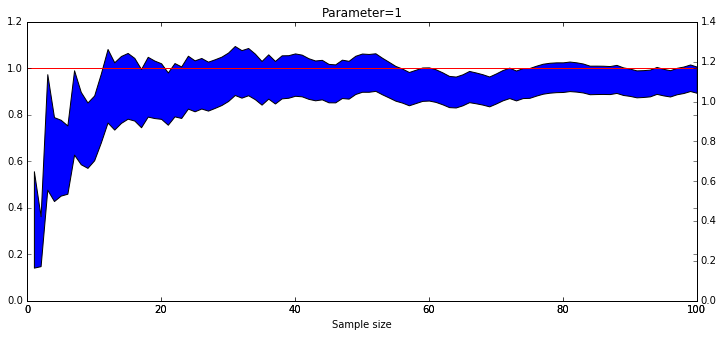

Для 𝑛 = 10 и 𝑛 = 100 оцениваю вероятность попадания истинного значения 𝜃 в интервал:
p=0.715 при n=10
p=0.683 при n=100


In [55]:
# Нижняя граница
def Interv1(sample,level,num=0):
    if num:
        i = num
        return (mean(sample[:i]))/((1/2) + (1/sqrt(12 * level * i)))
    else:
        return [(mean(sample[:i]))/((1/2) + (1/sqrt(12 * level * i))) for i in range(1,len(sample)+1)]

# Верхняя граница
def Interv2(sample,level,num=0):
    if num:
        i = num
        return (mean(sample[:i]))/((1/2) - (1/sqrt(12 * level * i)))
    else:
        return [(mean(sample[:i]))/((1/2) - (1/sqrt(12 * level * i))) for i in range(1,len(sample)+1)]

uni_sample = uniform.rvs(size=n, scale=theta)

# Строю доверительный интервал
fig1 = figure(figsize=(12,5))

ax1 = fig1.add_subplot(111)
ax1.fill_between(arange(1,n+1),Interv1(uni_sample,alpha),Interv2(uni_sample,alpha))
ax1.axhline(y=theta,color='red')

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax2.plot([ax1.get_ylim()])
ax2.yaxis.tick_right()

xlabel('Sample size')
title('Parameter={}'.format(theta))
show()

# Оцениваю вероятности
samples = np.zeros((num_of_samples, n))

# Записываю последовательности границ интервалов
# для n = 10
low_inter1 = np.zeros(num_of_samples)
high_inter1 = np.zeros(num_of_samples)

# Записываю последовательности границ интервалов
# для n = 100
low_inter2 = np.zeros(num_of_samples)
high_inter2 = np.zeros(num_of_samples)

for i in range(num_of_samples):
    samples[i] = uniform.rvs(size=n, scale=theta)
    low_inter1[i] = Interv1(samples[i],alpha,n1)
    high_inter1[i] = Interv2(samples[i],alpha,n1)
    low_inter2[i] = Interv1(samples[i],alpha,n2)
    high_inter2[i] = Interv2(samples[i],alpha,n2)

# Сюда записываю 1 - если theta попала в интевал,
# 0 - иначе
bools1 = np.zeros(num_of_samples)
bools2 = np.zeros(num_of_samples)
for i in range(num_of_samples):
    bools1[i] = (theta >= low_inter1[i] and theta <= high_inter1[i])
    bools2[i] = (theta >= low_inter2[i] and theta <= high_inter2[i])

print('Для 𝑛 = 10 и 𝑛 = 100 оцениваю вероятность попадания истинного значения 𝜃 в интервал:')
print(('p={} при n={}').format(mean(bools1),n1))
print(('p={} при n={}').format(mean(bools2),n2))

### Confidence interval with $X_{(1)}$

$\theta \in \left( X_{(1)}, \frac{X_{(1)}}{1-\sqrt[n]{\alpha}} \right)$

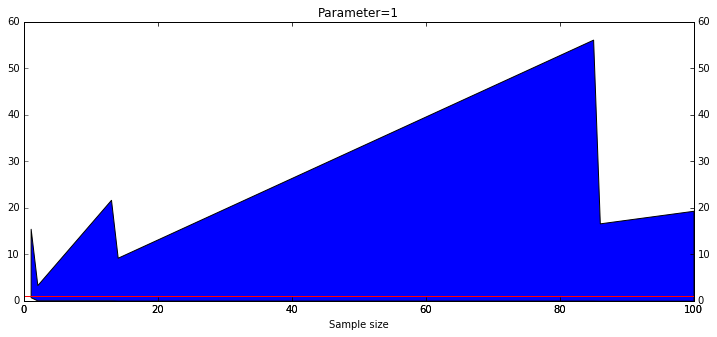

Для 𝑛 = 10 и 𝑛 = 100 оцениваю вероятность попадания истинного значения 𝜃 в интервал:
p=0.961 при n=10
p=0.944 при n=100


In [56]:
# Нижняя граница
def Interv1(sample,level,num=0):
    if num:
        i = num
        return min(sample[:i])
    else:
        return [min(sample[:i]) for i in range(1,len(sample)+1)]

# Верхняя граница
def Interv2(sample,level,num=0):
    if num:
        i = num
        return min(sample[:i])/(1 - (pow(level,1./i)))
    else:
        return [min(sample[:i])/(1 - (pow(level,1./i))) for i in range(1,len(sample)+1)]

uni_sample = uniform.rvs(size=n, scale=theta)

# Строю доверительный интервал
fig1 = figure(figsize=(12,5))

ax1 = fig1.add_subplot(111)
ax1.fill_between(arange(1,n+1),Interv1(uni_sample,alpha),Interv2(uni_sample,alpha))
ax1.axhline(y=theta,color='red')

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax2.plot([ax1.get_ylim()])
ax2.yaxis.tick_right()

xlabel('Sample size')
title('Parameter={}'.format(theta))
show()

# Оцениваю вероятности
samples = np.zeros((num_of_samples, n))

# Записываю последовательности границ интервалов
# для n = 10
low_inter1 = np.zeros(num_of_samples)
high_inter1 = np.zeros(num_of_samples)

# Записываю последовательности границ интервалов
# для n = 100
low_inter2 = np.zeros(num_of_samples)
high_inter2 = np.zeros(num_of_samples)

for i in range(num_of_samples):
    samples[i] = uniform.rvs(size=n, scale=theta)
    low_inter1[i] = Interv1(samples[i],alpha,n1)
    high_inter1[i] = Interv2(samples[i],alpha,n1)
    low_inter2[i] = Interv1(samples[i],alpha,n2)
    high_inter2[i] = Interv2(samples[i],alpha,n2)

# Сюда записываю 1 - если theta попала в интевал,
# 0 - иначе
bools1 = np.zeros(num_of_samples)
bools2 = np.zeros(num_of_samples)
for i in range(num_of_samples):
    bools1[i] = (theta >= low_inter1[i] and theta <= high_inter1[i])
    bools2[i] = (theta >= low_inter2[i] and theta <= high_inter2[i])

print('Для 𝑛 = 10 и 𝑛 = 100 оцениваю вероятность попадания истинного значения 𝜃 в интервал:')
print(('p={} при n={}').format(mean(bools1),n1))
print(('p={} при n={}').format(mean(bools2),n2))

### Confidence interval with $X_{(n)}$

$\theta \in \left( X_{(n)}, \frac{X_{(n)}}{\varepsilon} \right), \: \text{where} \: \varepsilon=\sqrt[n]{1-\alpha}$

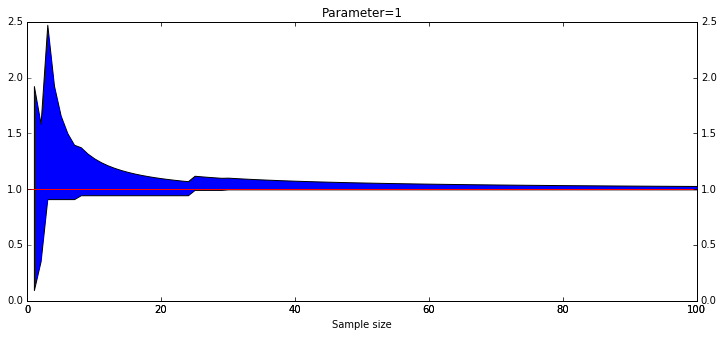

Для 𝑛 = 10 и 𝑛 = 100 оцениваю вероятность попадания истинного значения 𝜃 в интервал:
p=0.951 при n=10
p=0.949 при n=100


In [57]:
# Нижняя граница
def Interv1(sample,level,num=0):
    if num:
        i = num
        return max(sample[:i])
    else:
        return [max(sample[:i]) for i in range(1,len(sample)+1)]

# Верхняя граница
def Interv2(sample,level,num=0):
    if num:
        i = num
        return max(sample[:i])/(pow(1.-level,1./i))
    else:
        return [max(sample[:i])/(pow(1.-level,1./i)) for i in range(1,len(sample)+1)]

uni_sample = uniform.rvs(size=n, scale=theta)

# Строю доверительный интервал
fig1 = figure(figsize=(12,5))

ax1 = fig1.add_subplot(111)
ax1.fill_between(arange(1,n+1),Interv1(uni_sample,alpha),Interv2(uni_sample,alpha))
ax1.axhline(y=theta,color='red')

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax2.plot([ax1.get_ylim()])
ax2.yaxis.tick_right()

xlabel('Sample size')
title('Parameter={}'.format(theta))
show()

# Оцениваю вероятности
samples = np.zeros((num_of_samples, n))

# Записываю последовательности границ интервалов
# для n = 10
low_inter1 = np.zeros(num_of_samples)
high_inter1 = np.zeros(num_of_samples)

# Записываю последовательности границ интервалов
# для n = 100
low_inter2 = np.zeros(num_of_samples)
high_inter2 = np.zeros(num_of_samples)

for i in range(num_of_samples):
    samples[i] = uniform.rvs(size=n, scale=theta)
    low_inter1[i] = Interv1(samples[i],alpha,n1)
    high_inter1[i] = Interv2(samples[i],alpha,n1)
    low_inter2[i] = Interv1(samples[i],alpha,n2)
    high_inter2[i] = Interv2(samples[i],alpha,n2)

# Сюда записываю 1 - если theta попала в интевал,
# 0 - иначе
bools1 = np.zeros(num_of_samples)
bools2 = np.zeros(num_of_samples)
for i in range(num_of_samples):
    bools1[i] = (theta >= low_inter1[i] and theta <= high_inter1[i])
    bools2[i] = (theta >= low_inter2[i] and theta <= high_inter2[i])

print('Для 𝑛 = 10 и 𝑛 = 100 оцениваю вероятность попадания истинного значения 𝜃 в интервал:')
print(('p={} при n={}').format(mean(bools1),n1))
print(('p={} при n={}').format(mean(bools2),n2))

# Poisson distribution

$\theta \in \left( \overline{X} - U_{\frac{1+\alpha}{2}} \frac{\overline{X}}{\sqrt{n}},\overline{X} + U_{\frac{1+\alpha}{2}} \frac{\overline{X}}{\sqrt{n}} \right)$, where $U_{\alpha}$ - $\alpha$-квантиль стандартного нормального распределения

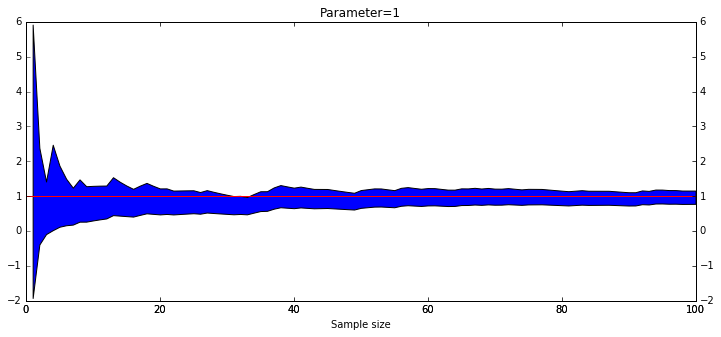

Для 𝑛 = 10 и 𝑛 = 100 оцениваю вероятность попадания истинного значения 𝜃 в интервал:
p=0.861 при n=10
p=0.935 при n=100


In [58]:
# Нижняя граница
def Interv1(sample,level,num=0):
    if num:
        i = num
        return np.mean(sample[:i]) * (1 - (norm.ppf((1+level)/2)/(sqrt(i))))
    else:
        return [np.mean(sample[:i]) * (1 - (norm.ppf((1+level)/2)/(sqrt(i))))\
                for i in range(1,len(sample)+1)]

# Верхняя граница
def Interv2(sample,level,num=0):
    if num:
        i = num
        return np.mean(sample[:i]) * (1 + (norm.ppf((1+level)/2)/(sqrt(i))))
    else:
        return [np.mean(sample[:i]) * (1 + (norm.ppf((1+level)/2)/(sqrt(i))))\
                for i in range(1,len(sample)+1)]

pois_sample = poisson.rvs(size=n, mu=theta)

# Строю доверительный интервал
fig1 = figure(figsize=(12,5))

ax1 = fig1.add_subplot(111)
ax1.fill_between(arange(1,n+1),Interv1(pois_sample,alpha),Interv2(pois_sample,alpha))
ax1.axhline(y=theta,color='red')

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax2.plot([ax1.get_ylim()])
ax2.yaxis.tick_right()

xlabel('Sample size')
title('Parameter={}'.format(theta))
show()

# Оцениваю вероятности
samples = np.zeros((num_of_samples, n))

# Записываю последовательности границ интервалов
# для n = 10
low_inter1 = np.zeros(num_of_samples)
high_inter1 = np.zeros(num_of_samples)

# Записываю последовательности границ интервалов
# для n = 100
low_inter2 = np.zeros(num_of_samples)
high_inter2 = np.zeros(num_of_samples)

for i in range(num_of_samples):
    samples[i] = poisson.rvs(size=n, mu=theta)
    low_inter1[i] = Interv1(samples[i],alpha,n1)
    high_inter1[i] = Interv2(samples[i],alpha,n1)
    low_inter2[i] = Interv1(samples[i],alpha,n2)
    high_inter2[i] = Interv2(samples[i],alpha,n2)

# Сюда записываю 1 - если theta попала в интевал,
# 0 - иначе
bools1 = np.zeros(num_of_samples)
bools2 = np.zeros(num_of_samples)
for i in range(num_of_samples):
    bools1[i] = (theta >= low_inter1[i] and theta <= high_inter1[i])
    bools2[i] = (theta >= low_inter2[i] and theta <= high_inter2[i])

print('Для 𝑛 = 10 и 𝑛 = 100 оцениваю вероятность попадания истинного значения 𝜃 в интервал:')
print(('p={} при n={}').format(mean(bools1),n1))
print(('p={} при n={}').format(mean(bools2),n2))

# Cauchy distribution

$\theta \in \left( \hat{\mu} - U_{\frac{1+\alpha}{2}} \frac{\pi}{2\sqrt{n}},\hat{\mu} + U_{\frac{1+\alpha}{2}} \frac{\pi}{2\sqrt{n}} \right)$, where $U_{\alpha}$ - $\alpha$-квантиль стандартного нормального распределения

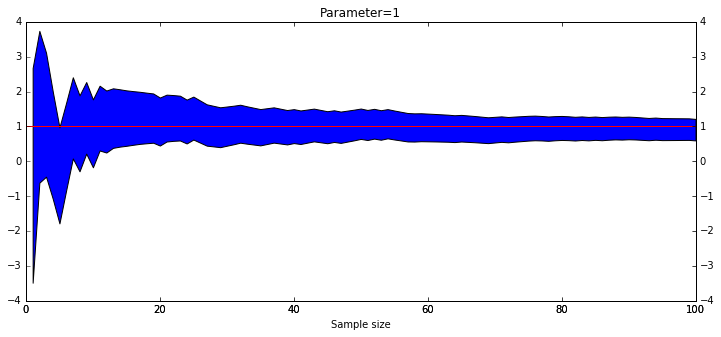

Для 𝑛 = 10 и 𝑛 = 100 оцениваю вероятность попадания истинного значения 𝜃 в интервал:
p=0.92 при n=10
p=0.942 при n=100


In [66]:
# Нижняя граница
def Interv1(sample,level,num=0):
    if num:
        i = num
        return np.median(sample[:i]) - (norm.ppf((1+level)/2) \
                                     * (pi/(2*sqrt(i))))
    else:
        return [np.median(sample[:i]) - (norm.ppf((1+level)/2) \
                                         * (pi/(2*sqrt(i)))) for i in range(1,len(sample)+1)]

# Верхняя граница
def Interv2(sample,level,num=0):
    if num:
        i = num
        return np.median(sample[:i]) + (norm.ppf((1+level)/2) \
                                     * (pi/(2*sqrt(i))))
    else:
        return [np.median(sample[:i]) + (norm.ppf((1+level)/2) \
                                         * (pi/(2*sqrt(i)))) for i in range(1,len(sample)+1)]

cau_sample = cauchy.rvs(size=n, loc=theta)

# Строю доверительный интервал
fig1 = figure(figsize=(12,5))

ax1 = fig1.add_subplot(111)
ax1.fill_between(arange(1,n+1),Interv1(cau_sample,alpha),Interv2(cau_sample,alpha))
ax1.axhline(y=theta,color='red')

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax2.plot([ax1.get_ylim()])
ax2.yaxis.tick_right()

xlabel('Sample size')
title('Parameter={}'.format(theta))
show()

# Оцениваю вероятности
samples = np.zeros((num_of_samples, n))

# Записываю последовательности границ интервалов
# для n = 10
low_inter1 = np.zeros(num_of_samples)
high_inter1 = np.zeros(num_of_samples)

# Записываю последовательности границ интервалов
# для n = 100
low_inter2 = np.zeros(num_of_samples)
high_inter2 = np.zeros(num_of_samples)

for i in range(num_of_samples):
    samples[i] = cauchy.rvs(size=n, loc=theta)
    low_inter1[i] = Interv1(samples[i],alpha,n1)
    high_inter1[i] = Interv2(samples[i],alpha,n1)
    low_inter2[i] = Interv1(samples[i],alpha,n2)
    high_inter2[i] = Interv2(samples[i],alpha,n2)

# Сюда записываю 1 - если theta попала в интевал,
# 0 - иначе
bools1 = np.zeros(num_of_samples)
bools2 = np.zeros(num_of_samples)
for i in range(num_of_samples):
    bools1[i] = (theta >= low_inter1[i] and theta <= high_inter1[i])
    bools2[i] = (theta >= low_inter2[i] and theta <= high_inter2[i])

print('Для 𝑛 = 10 и 𝑛 = 100 оцениваю вероятность попадания истинного значения 𝜃 в интервал:')
print(('p={} при n={}').format(mean(bools1),n1))
print(('p={} при n={}').format(mean(bools2),n2))

# Gamma distribution

### $\lambda$ is known

$\theta \in \left( \overline{X} - U_{\frac{1+\alpha}{2}} \frac{\overline{X}}{\sqrt{\lambda n}},\overline{X} + U_{\frac{1+\alpha}{2}} \frac{\overline{X}}{\sqrt{\lambda n}} \right)$, where $U_{\alpha}$ - $\alpha$-квантиль стандартного нормального распределения

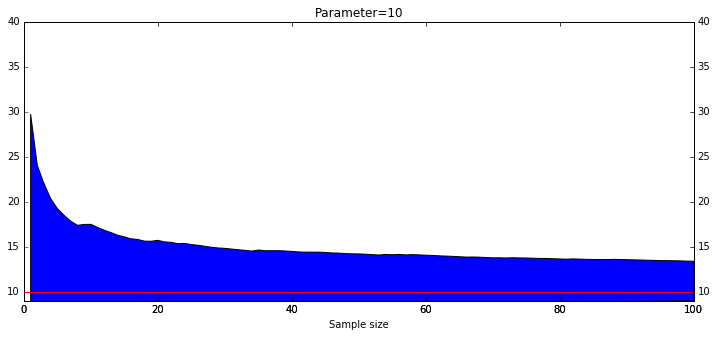

Для 𝑛 = 10 и 𝑛 = 100 оцениваю вероятность попадания истинного значения 𝜃 в интервал:
p=1.0 при n=10
p=1.0 при n=100


In [72]:
# Нижняя граница
def Interv1(sample,level,num=0):
    if num:
        i = num
        return mean(sample[:i]) * (1 - (norm.ppf((1+level)/2)/sqrt(params[1]*i)))
    else:
        return [mean(sample[:i]) * (1 - (norm.ppf((1+level)/2)/sqrt(params[1]*i)))\
                    for i in range(1,len(sample)+1)]

# Верхняя граница
def Interv2(sample,level,num=0):
    if num:
        i = num
        return mean(sample[:i]) * (1 + (norm.ppf((1+level)/2)/sqrt(params[1]*i)))
    else:
        return [mean(sample[:i]) * (1 + (norm.ppf((1+level)/2)/sqrt(params[1]*i)))\
                        for i in range(1,len(sample)+1)]

gam_sample = gamma.rvs(1, 10, size=n)

# Строю доверительный интервал
fig1 = figure(figsize=(12,5))

ax1 = fig1.add_subplot(111)
ax1.fill_between(arange(1,n+1),Interv1(gam_sample,alpha),Interv2(gam_sample,alpha))
ylim((9,40))

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax2.plot([ax1.get_ylim()])
ax2.yaxis.tick_right()

ylim((9,40))
ax2.axhline(y=10,color='red')
xlabel('Sample size')
title('Parameter={}'.format(10))
show()

# Оцениваю вероятности
samples = np.zeros((num_of_samples, n))

# Записываю последовательности границ интервалов
# для n = 10
low_inter1 = np.zeros(num_of_samples)
high_inter1 = np.zeros(num_of_samples)

# Записываю последовательности границ интервалов
# для n = 100
low_inter2 = np.zeros(num_of_samples)
high_inter2 = np.zeros(num_of_samples)

for i in range(num_of_samples):
    samples[i] = gamma.rvs(1, 10, size=n)
    low_inter1[i] = Interv1(samples[i],alpha,n1)
    high_inter1[i] = Interv2(samples[i],alpha,n1)
    low_inter2[i] = Interv1(samples[i],alpha,n2)
    high_inter2[i] = Interv2(samples[i],alpha,n2)

# Сюда записываю 1 - если theta попала в интевал,
# 0 - иначе
bools1 = np.zeros(num_of_samples)
bools2 = np.zeros(num_of_samples)
for i in range(num_of_samples):
    bools1[i] = (10 >= low_inter1[i] and 10 <= high_inter1[i])
    bools2[i] = (10 >= low_inter2[i] and 10 <= high_inter2[i])

print('Для 𝑛 = 10 и 𝑛 = 100 оцениваю вероятность попадания истинного значения 𝜃 в интервал:')
print(('p={} при n={}').format(mean(bools1),n1))
print(('p={} при n={}').format(mean(bools2),n2))

### $\lambda$ is unknown

Тут получилось немного посложнее - пришлось считать выборочную ковариацию, а также градиент функции $f(x,y) = \frac{x}{y-x^2}$ в точках $\left( Ex,Ex^2 \right)$.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in double_scalars


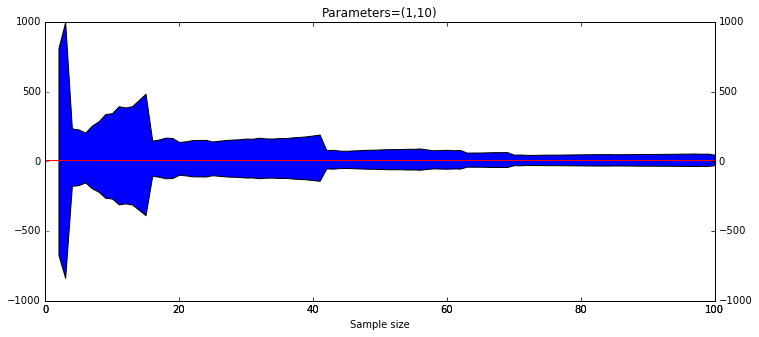

Для 𝑛 = 10 и 𝑛 = 100 оцениваю вероятность попадания истинного значения 𝜃 в интервал:
p=0.993 при n=10
p=1.0 при n=100


In [73]:
def cov(sample):
    # Необходимо посчитать матрицу ковариаций mean(X) и mean(X**2)
    covv = np.zeros((2,2))
    # Заполняю матрицу ковариаций
    covv[0][0] = (1/n) * sum([ (i - my_mean(sample))**2 for i in sample ])
    covv[1][1] = (1/n) * sum([ ((i ** 2) - my_mean2(sample))**2 for i in sample ])
    covv[0][1] = (1/n) * sum([ ((i ** 2) - my_mean2(sample))*(i - my_mean(sample)) for i in sample ])
    covv[1][0] = covv[0][1]
    return covv

def my_mean(sample):
    return mean(sample)

def my_mean2(sample):
    return mean(sample ** 2)

def nabla_f(x,y):
    return np.array([ (y+(3*(x**2))) / ((y - (x**2)) ** 2), -x / ((y - (x**2)) ** 2) ])

def my_sigma2(sample):
    return np.dot(nabla_f(my_mean(sample), my_mean2(sample)),\
                  cov(sample)).dot(nabla_f(my_mean(sample), my_mean2(sample)))

def sample_theta(sample):
    return (my_mean(sample) / (my_mean2(sample) - (my_mean(sample) ** 2)))

# Нижняя граница
def Interv1(sample,level,num=0):
    if num:
        i = num
        return sample_theta(sample[:i]) - ((sqrt(my_sigma2(sample[:i])) * norm.ppf((1+level)/2)) / sqrt(i))
    else:
        return [sample_theta(sample[:i]) - ((sqrt(my_sigma2(sample[:i])) * norm.ppf((1+level)/2)) / sqrt(i))\
                for i in range(1,len(sample)+1)]

# Верхняя граница
def Interv2(sample,level,num=0):
    if num:
        i = num
        return sample_theta(sample[:i]) + ((sqrt(my_sigma2(sample[:i])) * norm.ppf((1+level)/2)) / sqrt(i))
    else:
        return [sample_theta(sample[:i]) + ((sqrt(my_sigma2(sample[:i])) * norm.ppf((1+level)/2)) / sqrt(i))\
                for i in range(1,len(sample)+1)]

gam_sample = gamma.rvs(1, 10, size=n)

# Строю доверительный интервал
fig1 = figure(figsize=(12,5))

ax1 = fig1.add_subplot(111)
ax1.fill_between(arange(1,n+1),Interv1(gam_sample,alpha),Interv2(gam_sample,alpha))
ax1.axhline(y=10,color='red')

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax2.plot([ax1.get_ylim()])
ax2.yaxis.tick_right()

xlabel('Sample size')
title('Parameters=({},{})'.format(1, 10))
show()

# Оцениваю вероятности
samples = np.zeros((num_of_samples, n))

# Записываю последовательности границ интервалов
# для n = 10
low_inter1 = np.zeros(num_of_samples)
high_inter1 = np.zeros(num_of_samples)

# Записываю последовательности границ интервалов
# для n = 100
low_inter2 = np.zeros(num_of_samples)
high_inter2 = np.zeros(num_of_samples)

for i in range(num_of_samples):
    samples[i] = gamma.rvs(1, 10, size=n)
    low_inter1[i] = Interv1(samples[i],alpha,n1)
    high_inter1[i] = Interv2(samples[i],alpha,n1)
    low_inter2[i] = Interv1(samples[i],alpha,n2)
    high_inter2[i] = Interv2(samples[i],alpha,n2)

# Сюда записываю 1 - если theta попала в интевал,
# 0 - иначе
bools1 = np.zeros(num_of_samples)
bools2 = np.zeros(num_of_samples)
for i in range(num_of_samples):
    bools1[i] = (params[0] >= low_inter1[i] and params[0] <= high_inter1[i])
    bools2[i] = (params[0] >= low_inter2[i] and params[0] <= high_inter2[i])
    
print('Для 𝑛 = 10 и 𝑛 = 100 оцениваю вероятность попадания истинного значения 𝜃 в интервал:')
print(('p={} при n={}').format(mean(bools1),n1))
print(('p={} при n={}').format(mean(bools2),n2))